In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip3 install omegaconf
!pip3 install einops
!pip3 install pytorch-lightning==1.7.1
!pip3 install torchmetrics==0.11.4
!pip3 install taming-transformers
!pip3 install kornia
!pip3 install git+https://github.com/openai/CLIP.git
!pip3 install openai-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=46e4ecf246117946071d5467af48ae34992f2f6e21e8d9689f694d1c3c52251f
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.5/701.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: torchmetrics
    Found existing installation: torchmetrics 1.2.1
    Uninstalling torchmetrics-1.2.1:
      Successfully uninstalled torchmetrics-1.2.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.7/705.7 kB 5.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-y2rk2cad
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-y2rk2cad
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
   

In [5]:
cd /content/drive/MyDrive/CIS5810/Final_Project/InST

/content/drive/MyDrive/CIS5810/Final_Project/InST


In [6]:
from evaluation.clip_eval import CLIPEvaluator
import torch
import torch.nn as nn
import numpy as np
import clip
from PIL import Image
import PIL

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
clipEvaluator = CLIPEvaluator(device)

def load_img(path):
    image = Image.open(path).convert("RGB")
    w, h = image.size
    print(f"loaded input image of size ({w}, {h}) from {path}")
    w, h = map(lambda x: x - x % 32, (w, h))  # resize to integer multiple of 32
    image = image.resize((512, 512), resample=PIL.Image.LANCZOS)
    image = np.array(image).astype(np.float32) / 255.0
    image = image[None].transpose(0, 3, 1, 2)
    image = torch.from_numpy(image)
    return 2.*image - 1.

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 128MiB/s]


In [7]:
#ZY
styles = ['1_style', '2_style', 'andre', 'cezanne', 'modern', 'monet', 'ukiyoe', 'VanGogh']
contents = ['1_content', '2_content', 'Green_Sea_Turtle_grazing_seagrass', 'photo0', 'photo1', 'photo4', 'photo7', 'photo10']
current_style = styles[4]
# current_content = contents[3]

i2is = []
for current_content in contents:

    style_image_path = "Style_Final/" + current_style + ".jpg"
    content_image_path = "Content_Final/" + current_content + ".jpg"
    style = load_img(style_image_path)
    content = load_img(content_image_path)
    generated = load_img('Results/Diffusion/8content-1style/'+current_content+'-'+current_style+'.png')
    i2i = clipEvaluator.img_to_img_similarity(content, generated)
    print(i2i.item())
    i2is.append(i2i.item())
print(i2is)

loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (600, 800) from Content_Final/1_content.jpg
loaded input image of size (512, 512) from Results/Diffusion/8content-1style/1_content-modern.png


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


0.7886548042297363
loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (1280, 900) from Content_Final/2_content.jpg
loaded input image of size (512, 512) from Results/Diffusion/8content-1style/2_content-modern.png
0.781883180141449
loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (3367, 2525) from Content_Final/Green_Sea_Turtle_grazing_seagrass.jpg
loaded input image of size (512, 512) from Results/Diffusion/8content-1style/Green_Sea_Turtle_grazing_seagrass-modern.png
0.8091123104095459
loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (522, 533) from Content_Final/photo0.jpg
loaded input image of size (512, 512) from Results/Diffusion/8content-1style/photo0-modern.png
0.7700756192207336
loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (256, 256) from Content_Final/photo1.jpg
loaded input image of size (512, 512)

In [8]:
x = [0.530583918094635, 0.57269287109375, 0.5183736085891724, 0.45901936292648315, 0.6453150510787964, 0.5529573559761047, 0.5665135383605957, 0.5745185017585754]
print(sum(x)/8)
x = [0.70513916015625, 0.7447537183761597, 0.6999989748001099, 0.5538002252578735, 0.8296843767166138, 0.7159943580627441, 0.71681809425354, 0.6856780052185059]
print(sum(x)/8)
x = [0.7908316850662231, 0.7629730701446533, 0.6577933430671692, 0.8011016845703125, 0.787382960319519, 0.7977317571640015, 0.838941216468811, 0.751141369342804]
print(sum(x)/8)
x = [0.5522202849388123, 0.6112505793571472, 0.4132568836212158, 0.6597903370857239, 0.3802010416984558, 0.5890536904335022, 0.5279642939567566, 0.5726311206817627]
print(sum(x)/8)
x = [0.7886548042297363, 0.781883180141449, 0.8091123104095459, 0.7700756192207336, 0.5231812000274658, 0.81234210729599, 0.7315168380737305, 0.7184667587280273]
print(sum(x)/8)
'''
i2i average
AlexNet/Output_Final_Compare_Style
0.5524967759847641
Fast_Style_Transfer/Output_Final_Compare_Style
0.7064833641052246
AlexNet/Output_Final_Compare_Content
0.7734871357679367
Fast_Style_Transfer/Output_Final_Compare_Content
0.5382960289716721
Diffusion/8content-1style
0.7419041022658348
'''

0.5524967759847641
0.7064833641052246
0.7734871357679367
0.5382960289716721
0.7419041022658348


'\ni2i average\nAlexNet/Output_Final_Compare_Style\n0.5524967759847641\nFast_Style_Transfer/Output_Final_Compare_Style\n0.7064833641052246\nAlexNet/Output_Final_Compare_Content\n0.7734871357679367\nFast_Style_Transfer/Output_Final_Compare_Content\n0.5382960289716721\n\n'

In [9]:
style = load_img('data/andre.jpg')
content = load_img('data/IMG_1581.JPG')
style2 = load_img('data/monet.jpg')
generated = load_img('outputs/img2img-samples/IMG_1581-*-0050.png')
i2i = clipEvaluator.img_to_img_similarity(style2, generated)

print(i2i)

loaded input image of size (800, 654) from data/andre.jpg
loaded input image of size (3840, 2160) from data/IMG_1581.JPG
loaded input image of size (256, 256) from data/monet.jpg


FileNotFoundError: ignored

In [ ]:
# text = 'a modern style of painting of the city'
# content = load_img('data/IMG_1581.JPG')
# generated = load_img('outputs/img2img-samples/IMG_1581-*-0050.png')
# t2i = clipEvaluator.txt_to_img_similarity(text, content)

# print(t2i)

In [10]:
import numpy as np
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
import tensorflow as tf
from math import sqrt
import cv2

input_shape = (256, 256, 3)

# def scale_images(image, new_shape):
#   images_list = []
#   new_image = resize(image, new_shape, 0)
#   images_list.append(new_image)
#   return asarray(images_list)

def calculate_fid(model, images1, images2, new_shape=input_shape): #lower is better
    images1_np = images1.permute(0, 2, 3, 1).cpu().numpy()
    images2_np = images2.permute(0, 2, 3, 1).cpu().numpy()
    images1_np = np.array([cv2.resize(img, (256, 256)) for img in images1_np])
    images2_np = np.array([cv2.resize(img, (256, 256)) for img in images2_np])
    images1_np = preprocess_input(images1_np)
    images2_np = preprocess_input(images2_np)

    act1 = model.predict(images1_np)
    act2 = model.predict(images2_np)
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
    ssdiff = np.sum((mu1 - mu2) ** 2.0)

    covmean = sqrt(sigma1*sigma2)
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = ssdiff + sigma1 + sigma2 - 2.0 * covmean
    return fid

IncModel = InceptionV3(include_top=False, pooling='avg', input_shape=input_shape)


87910968/87910968 [==============================] - 1s 0us/step


In [11]:
images1 = load_img('data/andre.jpg')
monet = load_img('data/monet.jpg')
modern = load_img('data/modern.jpg')
content = load_img('data/IMG_1581.JPG')

images2 = load_img('outputs/img2img-samples/IMG_1581-*-0051.png')
images3 = load_img('outputs/img2img-samples/IMG_1581-*-0050.png')
fid_value = calculate_fid(IncModel, style, images3) #only style
print(fid_value)

loaded input image of size (800, 654) from data/andre.jpg
loaded input image of size (256, 256) from data/monet.jpg
loaded input image of size (960, 1200) from data/modern.jpg
loaded input image of size (3840, 2160) from data/IMG_1581.JPG


FileNotFoundError: ignored

In [ ]:
#ZY
styles = ['1_style', '2_style', 'andre', 'cezanne', 'modern', 'monet', 'ukiyoe', 'VanGogh']
contents = ['1_content', '2_content', 'Green_Sea_Turtle_grazing_seagrass', 'photo0', 'photo1', 'photo4', 'photo7', 'photo10']
current_style = styles[4]
# current_content = contents[3]

fid_values = []
for current_content in contents:
    style_image_path = "Style_Final/" + current_style + ".jpg"
    content_image_path = "Content_Final/" + current_content + ".jpg"
    style = load_img(style_image_path)
    content = load_img(content_image_path)
    # generated = load_img('Results/AlexNet/Output_Final_Compare_Content/'+current_content+' under '+current_style+'.jpg')
    generated = load_img('Results/VGG19/1style-8content/vgg19-'+current_content+'-modern.jpg')
    fid_value = calculate_fid(IncModel, style, generated)
    fid_values.append(fid_value)
print(fid_values)
print(sum(fid_values)/8)
'''
AlexNet
[44.53604346321139, 43.405333033353415, 39.9244878569825, 24.94206623863748, 48.581333433915745, 41.751548822946255, 33.95462099807872, 25.10238411447806]
37.774727245200445
Diffusion
[41.99401360644316, 63.37865006696808, 56.1790688706037, 49.692893144792336, 36.0232016495188, 49.32803183031896, 53.150766475672626, 54.22138314830948]
50.49600109907839
Fast_Style_Transfer
[27.356729630517982, 48.07925909576043, 26.44680413278562, 23.07883036284575, 33.09092278082039, 31.320470424176577, 34.11988590780913, 26.635571293211083]
31.266059203490872
MST
[43.692698799697105, 59.69918154799499, 53.01033471015259, 26.33188452400227, 49.588971239413304, 54.62115860272873, 27.101866603006002, 38.82596482759296]
44.10900760682349
ResNet50
[32.47764407570794, 46.817876871346996, 28.04738581435871, 23.5376191108195, 41.58282578169869, 38.90474743282861, 43.557777335396025, 21.364472700573835]
34.536293640341285
VGG19
[36.05930983745761, 36.44711977043862, 32.7979336624379, 25.110774121142374, 26.562734215811044, 34.24715464060209, 38.974769860992446, 46.70298020259499]
34.61284703893463
'''

loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (600, 800) from Content_Final/1_content.jpg
loaded input image of size (384, 512) from Results/VGG19/1style-8content/vgg19-1_content-modern.jpg
1/1 [==============================] - 0s 276ms/step
loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (1280, 900) from Content_Final/2_content.jpg
loaded input image of size (512, 360) from Results/VGG19/1style-8content/vgg19-2_content-modern.jpg
1/1 [==============================] - 0s 153ms/step
loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded input image of size (3367, 2525) from Content_Final/Green_Sea_Turtle_grazing_seagrass.jpg
loaded input image of size (512, 383) from Results/VGG19/1style-8content/vgg19-Green_Sea_Turtle_grazing_seagrass-modern.jpg
1/1 [==============================] - 0s 162ms/step
loaded input image of size (960, 1200) from Style_Final/modern.jpg
loaded in

'\nAlexNet\n[44.53604346321139, 43.405333033353415, 39.9244878569825, 24.94206623863748, 48.581333433915745, 41.751548822946255, 33.95462099807872, 25.10238411447806]\n37.774727245200445\nDiffusion\n[41.99401360644316, 63.37865006696808, 56.1790688706037, 49.692893144792336, 36.0232016495188, 49.32803183031896, 53.150766475672626, 54.22138314830948]\n50.49600109907839\nFast_Style_Transfer\n[27.356729630517982, 48.07925909576043, 26.44680413278562, 23.07883036284575, 33.09092278082039, 31.320470424176577, 34.11988590780913, 26.635571293211083]\n31.266059203490872\nMST\n[43.692698799697105, 59.69918154799499, 53.01033471015259, 26.33188452400227, 49.588971239413304, 54.62115860272873, 27.101866603006002, 38.82596482759296]\n44.10900760682349\nResNet50\n[32.47764407570794, 46.817876871346996, 28.04738581435871, 23.5376191108195, 41.58282578169869, 38.90474743282861, 43.557777335396025, 21.364472700573835]\n34.536293640341285\n'

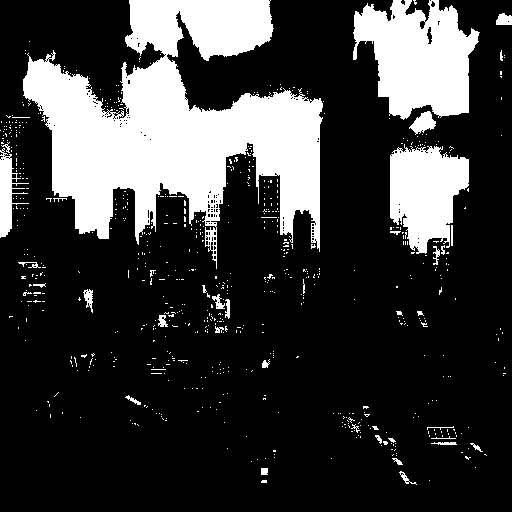

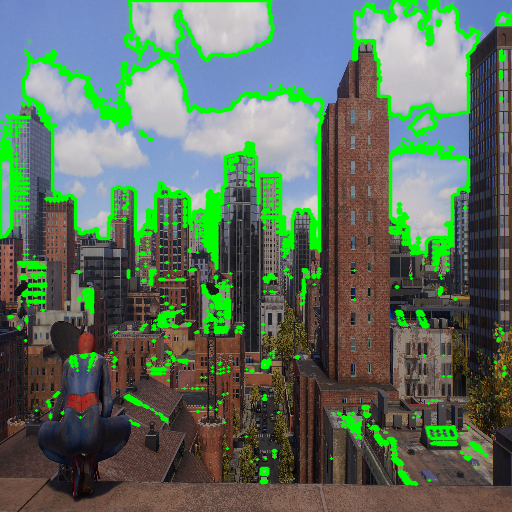

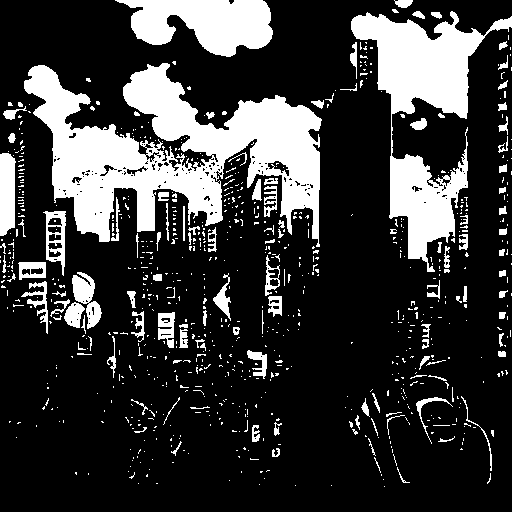

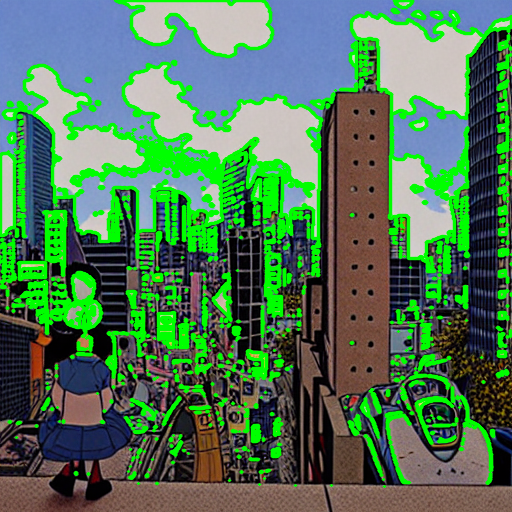

931 993


In [14]:
import cv2
from google.colab.patches import cv2_imshow

content_image = cv2.imread('data/IMG_1581.JPG')
generated_image = cv2.imread('outputs/img2img-samples/IMG_1581-_-0044.png')

image = cv2.resize(content_image, (512, 512))
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# # draw contours on the original image
# image_copy = image.copy()
# cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# # see the results
# cv2_imshow(image_copy)
# cv2.waitKey(0)
# cv2.imwrite('contours_none_image1.jpg', image_copy)
# cv2.destroyAllWindows()

contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image_copy1)
cv2.waitKey(0)
cv2.imwrite('contours_simple_image1.jpg', image_copy1)
cv2.destroyAllWindows()


image1 = cv2.resize(generated_image, (512, 512))
img_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.imwrite('image_thres1.jpg', thresh)
cv2.destroyAllWindows()

contours2, hierarchy2 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image_copy2)
cv2.waitKey(0)
cv2.imwrite('contours_simple_image1.jpg', image_copy2)
cv2.destroyAllWindows()

print(len(contours1), len(contours2))



In [ ]:
# ----- none -----

import cv2
import numpy as np

def calculate_iou(contour1, contour2):
    # Create binary images from the contours
    img1 = np.zeros((512, 512), dtype=np.uint8)
    img2 = np.zeros((512, 512), dtype=np.uint8)
    cv2.drawContours(img1, [contour1], -1, 1, -1)
    cv2.drawContours(img2, [contour2], -1, 1, -1)

    # Calculate intersection and union
    intersection = np.logical_and(img1, img2)
    union = np.logical_or(img1, img2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def evaluate_contours(true_contours, detected_contours, iou_threshold=0.5):
    TP, FP, FN = 0, 0, 0

    matched = set()
    for d_contour in detected_contours:
        is_match = False
        for idx, t_contour in enumerate(true_contours):
            if calculate_iou(d_contour, t_contour) > iou_threshold and idx not in matched:
                TP += 1
                matched.add(idx)
                is_match = True
                break
        if not is_match:
            FP += 1

    FN = len(true_contours) - len(matched)

    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f_score


precision, recall, f_score = evaluate_contours(contours2, contours1)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F-score: {f_score:.3f}")

Precision: 0.008
Recall: 0.008
F-score: 0.008


In [ ]:
def calc_precision_recall(contours_a, contours_b, threshold):
    x = contours_a
    y = contours_b

    xx = np.array(x)
    hits = []
    for yrec in y:
        d = np.square(xx[:,0] - yrec[0]) + np.square(xx[:,1] - yrec[1])
        hits.append(np.any(d < threshold*threshold))
    top_count = np.sum(hits)

    try:
        precision_recall = top_count / len(y)
    except ZeroDivisionError:
        precision_recall = 0

    return precision_recall, top_count, len(y)


precision_recall, top_count, length = calc_precision_recall(contours2, contours1,0.5)
print(f"Precision: {precision_recall:.3f}")
print(f"Recall: {top_count:.3f}")
print(f"F-score: {length:.3f}")

In [ ]:

image1 = cv2.imread('data/modern.jpg')
image1 = cv2.resize(image1, (512, 512))

img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image_copy2)
cv2.waitKey(0)
image_copy3 = image1.copy()
for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2_imshow(image_copy3)
cv2.waitKey(0)
cv2.imwrite('contour_point_simple.jpg', image_copy3)
cv2.destroyAllWindows()
print(len(contours2))

In [ ]:
from numpy import asarray
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import exp

# calculate the inception score for p(y|x)
def calculate_inception_score(p_yx, eps=1E-16):
    p_y = expand_dims(p_yx.mean(axis=0), 0)
    kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
    sum_kl_d = kl_d.sum(axis=1)
    avg_kl_d = mean(sum_kl_d)
    is_score = exp(avg_kl_d)
    return is_score

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 114MiB/s]
